<a href="https://colab.research.google.com/github/kcrow74/PIC-Math-Workshop-on-Data-Science-2022/blob/main/data_cleaning_basicsmyversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

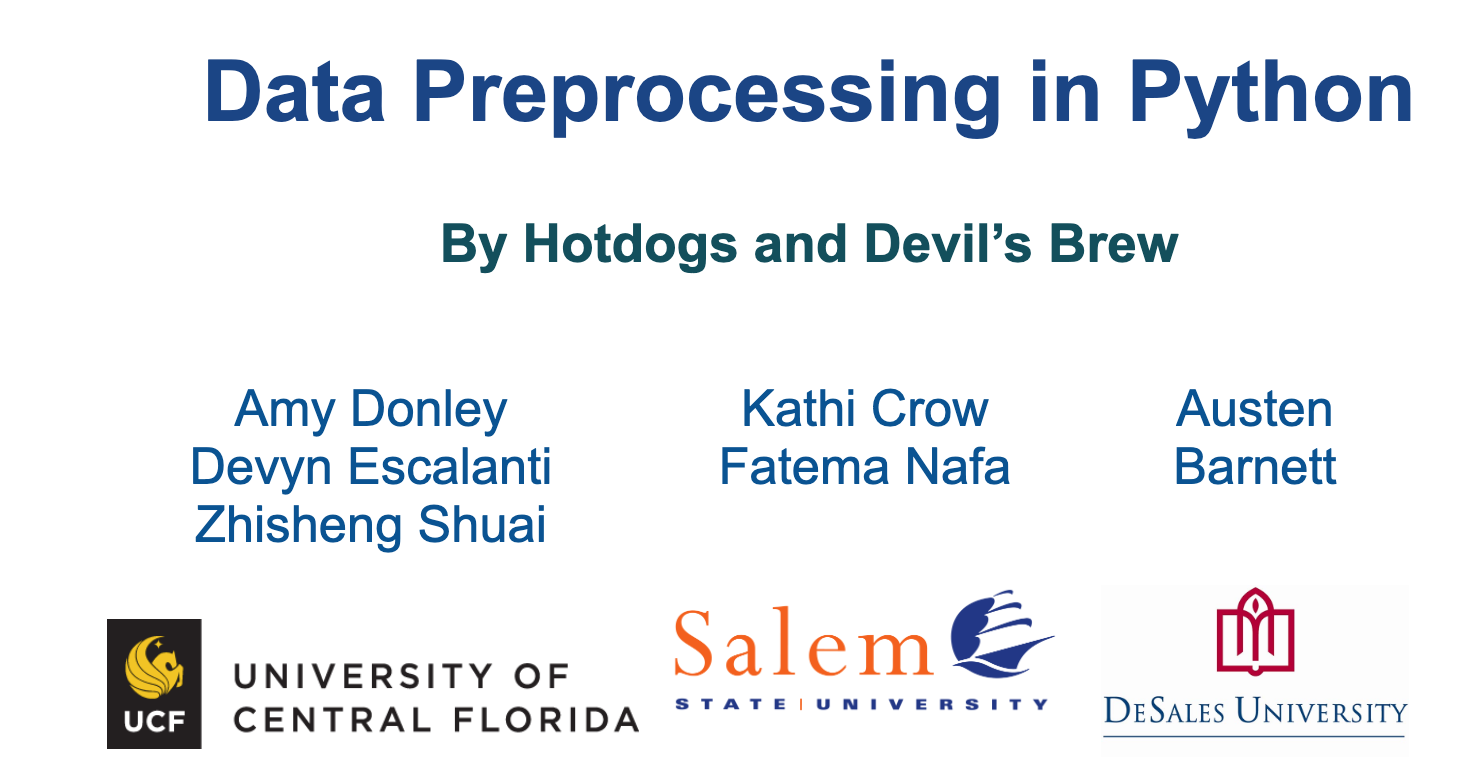

**` Uploading the appropriate libraries`**

When working with data, the first thing is to upload the appropriate libraries. Libraries allow you to perform different functions (although python has some built in functions). 

If you want to annotate code you can use a # symbol. Python will ignore code lines :)


In [ ]:
#first let's import the usual suspects
#os allows us to change directory and create directories
import os
#numpy allows for a few mathematical operations (such as calculating mean, standard deviation etc.., but also min, max etc..)
#also numpy allows to operate with specific python data types called arrays and matrices
import numpy as np
#pandas allows to work with dataframes (other type of python data, and do some stat analysis)
import pandas as pd
#matplotlib is used for plottinig and doing figures
import matplotlib.pyplot as plt

In [ ]:
#import data set 
#normally I set a working directory which has access to a lot of files. 
#However, when dealing with 1 dataset, uploading it in the side bar is easier 
d1 = 'panel copy.csv' #define the data 
data = pd.read_csv(d1, header = 0) #read the data 

In [ ]:
print(data) #Is this the data we want? (yes!)

      Unnamed: 0 iso3  ccode  location_id  country  year  dum_2010s  \
0              1  DZA  615.0          139  Algeria  1991        0.0   
1              2  DZA  615.0          139  Algeria  1992        0.0   
2              3  DZA  615.0          139  Algeria  1993        0.0   
3              4  DZA  615.0          139  Algeria  1994        0.0   
4              5  DZA  615.0          139  Algeria  1995        0.0   
...          ...  ...    ...          ...      ...   ...        ...   
1451        1452  NaN    NaN          172      NaN  2010        1.0   
1452        1453  NaN    NaN          172      NaN  2011        1.0   
1453        1454  NaN    NaN          172      NaN  2012        1.0   
1454        1455  NaN    NaN          172      NaN  2013        1.0   
1455        1456  NaN    NaN          172      NaN  2014        1.0   

      dum_2000s  dum_1990s  ucdp_event_count  ...  dalys_lower    yld_rate  \
0           0.0        1.0               4.0  ...     2.683696    0.7

In [ ]:
#let's take a look at some observations.
data.sample(5) 

In [ ]:
#let's find out how many observations are for each country? Let's see....
data['country'].value_counts()

In [ ]:
#Lets re-order the data! This time, the dataframe will be sorted by country then year.
data = data.sort_values(by = ['year', 'country'])
print(data)

In [ ]:
#dropping data columns 
data.drop(columns='ccode', axis = 1)

In [ ]:
#checking the data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 999
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1456 non-null   int64  
 1   iso3                1420 non-null   object 
 2   ccode               1420 non-null   float64
 3   location_id         1456 non-null   int64  
 4   country             1420 non-null   object 
 5   year                1456 non-null   int64  
 6   dum_2010s           1428 non-null   float64
 7   dum_2000s           1428 non-null   float64
 8   dum_1990s           1428 non-null   float64
 9   ucdp_event_count    1418 non-null   float64
 10  central_africa_dum  1420 non-null   float64
 11  north_africa_dum    1420 non-null   float64
 12  pop_growth          1392 non-null   float64
 13  reign               1420 non-null   object 
 14  dem_dum             1428 non-null   float64
 15  reign_id            1420 non-null   float64
 16  educati

In [ ]:
#What can we do with the data? Let's make some visualizations. :) 
#we need the correct libraries! 
import seaborn as sns #this is for heat maps 
from datetime import datetime
! pip install calplot
import calplot
!pip install heatmapz

In [ ]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

In [ ]:
hiv = data[['country' , 'prevalence_rate', 'year']]
hiv1 = hiv.reindex(['country','year','prevalence_rate'], axis=1)
hiv1

,country,year,prevalence_rate
0,Algeria,1991,4.867337
28,Angola,1991,188.495302
56,Benin,1991,224.900019
84,Botswana,1991,8942.740237
112,Burkina Faso,1991,4757.026793
...,...,...,...
1363,Uganda,2018,5543.907872
1391,United Republic of Tanzania,2018,4348.385210
1419,Zambia,2018,10544.347130
1447,Zimbabwe,2018,12257.854220


In [ ]:
hiv1["prevalence_rate"] = pd.to_numeric(hiv1["prevalence_rate"])
hiv1["year"] = pd.to_numeric(hiv1["year"])

cm = sns.light_palette("blue", as_cmap=True)
hiv1.style.background_gradient(cmap=cm, subset=["prevalence_rate", "year"])

Text(0.5, 1.0, 'Correlation between different fearures')

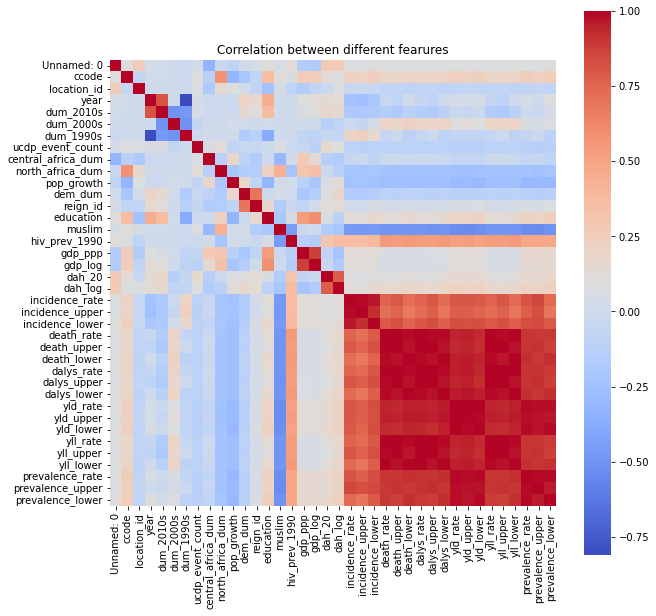

In [ ]:
plt.figure(figsize=(10,10))
g = sns.heatmap(data.corr(), vmax=1, square=True,cmap='coolwarm',xticklabels=True,yticklabels=True)
g.set_yticklabels(g.get_yticklabels(), rotation =0)
g.set_xticklabels(g.get_yticklabels(), rotation =90)
plt.title('whatever')

In [ ]:
#selecting certain data columns 
hiv = data[['country' , 'prevalence_rate', 'year']]
hiv

In [ ]:
Ang = data[data['country'].isin(['Angola'])]
Ang

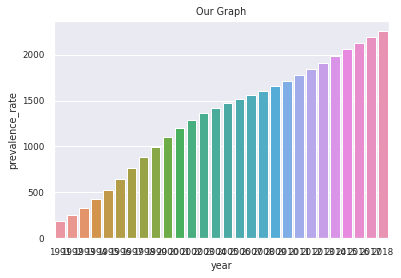

In [ ]:
sns.barplot(x = "year", y = "prevalence_rate", data = Ang).set(title='Our Graph')
plt.show()

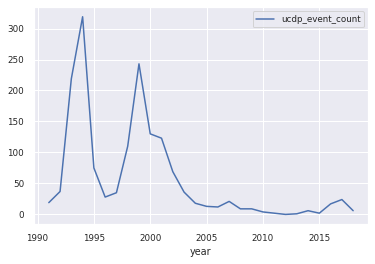

In [ ]:
data2 = Ang[['year' , 'ucdp_event_count']]
data2.set_index('year').plot();